# Latar Belakang
Transjakarta is having a plan to expand in terms of infrastructure and Strategic processes and they would like to see which stations and routes should be expanded on or improved on

## Pernyataan Masalah
The objective here is to present the data to the operations and infrastructure manager and team, we are going to identify which corridors/routes are most frequently used or face congestion, and which stops are in heavy use. We will do this by identifying/answering the following questions:

-Which corridors have the highest traffic (most transactions)?

-What are the most common tap-in and tap-out stop pairs?

-What are the most common tap-in and tap-out stations individually?

-Are there specific routes or stops that have high usage during certain hours/days?

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data penumpang yang sudah dikumpulkan oleh perusahaan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\FARRAS WARROIHAN\OneDrive\Desktop\Bootcamp\Capstone2\Public Transportation Transaction - Transjakarta-20250618T014629Z-1-001\Public Transportation Transaction - Transjakarta\Transjakarta.csv", sep=',')


Dataset ini berisi informasi terkait Transjakarta riders, travel behavior, routes, timing, and payment.
1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.

In [4]:
#The following will show the first 5 and last 5 data from the table
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning

In this section we ensure that the data that was given to us is clean, and that we understand what each coloumn is and what relationship they have with each other

In [5]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [7]:
#lets first change the formats of the datas where appropriate
df['payCardID'] = df['payCardID'].astype(str)
df['payCardBank'] = df['payCardBank'].astype('category')
df['payCardSex'] = df['payCardSex'].astype('category')
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['payAmount'] = pd.to_numeric(df['payAmount'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  category      
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [9]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"['emoney', 'dki', 'flazz', 'online', 'brizzi', 'bni'] Categories (6, object): ['bni', 'brizzi', 'dki', 'emoney', 'flazz', 'online']"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Sa

Check to make sure that there are no duplicates that needs to be dropped and check for any missing values

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [12]:
df_missing = df[df['tapInStops'].isna()][['payCardID','payCardName','payCardBirthDate','corridorID','corridorName','tapInStops','tapInStopsName','tapOutStopsName','payAmount']].sort_values(by='payCardName')
df_missing

,payCardID,payCardName,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStopsName,payAmount
19664,4484508142147221,Abyasa Haryanti,1948,JAK.07,Tanah Abang - Grogol via Tawakal,NaN,Ps. Gantung,Simpang Semangka I,0.0
16664,4484508142147221,Abyasa Haryanti,1948,JAK.07,Tanah Abang - Grogol via Tawakal,NaN,Ps. Gantung,Simpang Semangka I,0.0
17583,503873796075,Ade Astuti,2004,JAK.20,Cawang UKI - Lubang Buaya,NaN,Simpang Squadron,Sekolah Fatimiyah Perdana Kusuma,0.0
36020,6011718928121822,Ade Halimah,1993,1R,Senen - Tanah Abang,NaN,Balai Kota 1,Jak Lingko Tanah Abang 2,3500.0
34372,213166724857828,Ade Waluyo,2004,9D,Pasar Minggu - Tanah Abang,NaN,JPO Blok G,Jak Lingko Tanah Abang 2,3500.0
...,...,...,...,...,...,...,...,...,...
5553,4203562511038947968,drg. Tantri Situmorang,1983,12,Tanjung Priok - Pluit,NaN,Gunung Sahari Mangga Dua,Permai Koja Arah Utara,3500.0
10353,4203562511038947968,drg. Tantri Situmorang,1983,12,Tanjung Priok - Pluit,NaN,Gunung Sahari Mangga Dua,Permai Koja Arah Utara,3500.0
5251,5125406223322395,"drg. Usyi Halimah, S.E.",2004,JAK.10,Tanah Abang - Kota,NaN,St. Jayakarta 2,Sbr. Sekolah Fajar Sion,0.0
516,213105773866033,drg. Zamira Nurdiyanti,1979,13,Ciledug - Tendean,NaN,Puri Beta 2,CBD Ciledug,3500.0


By checking the data I noticed that some of the missing values can be filled in, as they are transactions that have previously been done, by the same person, starting in the same station, ending in the same station at different dates, in approximately around the same time. Which means that a majority of the values can be accurately filled using the data from previous days.

In [13]:
#as tapinstops are just unique ids for trainstations we can fill them in using data that is currently available in the table
df['tapInStops'] = df['tapInStops'].fillna(df.groupby('tapInStopsName')['tapInStops'].transform('first'))

In [14]:
#Here we fill in the missing TapOutStopsName based on the customer patterns, if a customer is going on the same line, and start from the same station
df['tapOutStopsName'] = df['tapOutStopsName'].fillna(df.groupby(['payCardID','tapInStopsName', 'corridorName', 'payCardName'])['tapOutStopsName'].transform('first'))

In [15]:
#Now that we have a majority of the tapOutStopsName, we can identify the tapOutStops using the tapOutStopsName or station names based on data that we have in the tapinstop
# first we make a table on the unique station ID's and names that we have
unique_stops = df[['tapInStops', 'tapInStopsName']].drop_duplicates().dropna()
unique_stops = unique_stops.reset_index(drop=True)

#then we map it by indexing it and dropping the duplicatess
station_data = unique_stops.drop_duplicates('tapInStopsName').set_index('tapInStopsName')['tapInStops']
#make sure to replace values of tapoutstops from the table of station_data if the tapOutStopsName matches in it
x = df['tapOutStops'].isna() & df['tapOutStopsName'].notna() #we are only looking for rows where tapOutStops are missing and tapOutStopsName is NOT missing
df.loc[x, 'tapOutStops'] = df.loc[x, 'tapOutStopsName'].map(station_data)


In [16]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          34  
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         861 
tapOutStopsName     194 
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [17]:
#Now that we have the tapOutStopsName we can determine the stopEndSeq based on already known data, as long as the corridor name, start station, and end station is the same the end sequence should also be the same as it is sequence of stops
df['stopEndSeq'] = df['stopEndSeq'].fillna(df.groupby(['tapInStopsName', 'corridorName', 'tapOutStopsName'])['stopEndSeq'].transform('first'))

In [18]:
#To determine the tapOutTime, we can fill it in using the mean time of previous transactions of the same person, starting at the same time.
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['tapOutTime'] = df['tapOutTime'].fillna(df.groupby(['payCardID','corridorName','tapInStopsName','tapOutStopsName'])['tapOutTime'].transform('mean'))

In [19]:
#now that we know the start and end station. we can also determine the corridor name based on current historical data
df['corridorName'] = df['corridorName'].fillna(df.groupby(['tapInStopsName', 'tapOutStopsName'])['corridorName'].transform('first'))

In [20]:
#in addition to that in case there are corridorName missing but there is corridorID we can also get the corridorName from the ID
df['corridorName'] = df['corridorName'].fillna(df.groupby('corridorID')['corridorName'].transform('first'))

In [21]:
#as corridorID is just the ID used to identify the corridor name, we can look at similar corridor names and fill it up accordingly
df['corridorID'] = df['corridorID'].fillna(df.groupby('corridorName')['corridorID'].transform('first'))

In [22]:
#we can fill in the longitude and latitude as well if the tapOutStopsName is the same
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(df.groupby('tapOutStopsName')['tapOutStopsLat'].transform('first'))
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(df.groupby('tapOutStopsName')['tapOutStopsLon'].transform('first'))

In [23]:
# we can find the missing payamount by checking for users who have left for the same route, start, and end station
df['payAmount'] = df['payAmount'].fillna(df.groupby(['corridorName','tapInStopsName','tapOutStopsName'])['payAmount'].transform('first'))

In [24]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          120 
corridorName        120 
direction           0   
tapInStops          34  
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         861 
tapOutStopsName     194 
tapOutStopsLat      194 
tapOutStopsLon      194 
stopEndSeq          194 
tapOutTime          194 
payAmount           1004
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  category      
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  category      
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37780 non-null  object        
 7   corridorName      37780 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37866 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

As we can see that there is still data missing, let's continue data cleaning first, with removing outliers, and data formating before we decide to drop/erase the coloumns or rows.

Outliers

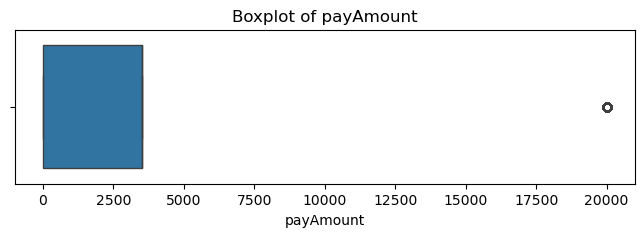

In [26]:
#let's see if there are any outliers in the pay amount, making sure there are no negatives, or outrageously large charges, we can see this using boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['payAmount'])
plt.title('Boxplot of payAmount')
plt.xlabel('payAmount')
plt.show()

In [27]:
#we can see that there are no negatives which is good, but there is a 20,000 IDR charge, let's see if this is a mistake in the table
outlierpay = df[df['payAmount'] == 20000][['payCardID', 'payCardName', 'payCardBirthDate', 'corridorID', 'corridorName','tapInStops', 'tapInStopsName', 'tapOutStopsName', 'payAmount']].sort_values(by='corridorName')
outlierpay
#There does not seem to be a mistake so we can keep it

,payCardID,payCardName,payCardBirthDate,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStopsName,payAmount
19822,639000296355,Catur Najmudin,2012,S12,BSD Serpong - Fatmawati,B05488P,St. MRT Fatmawati,Term. BSD,20000.0
32012,3512927531214772,Ifa Rajasa,1965,S12,BSD Serpong - Fatmawati,B05488P,St. MRT Fatmawati,Sbr. Versailles,20000.0
31942,3583719174260210,Uchita Kuswoyo,1996,S12,BSD Serpong - Fatmawati,B05488P,St. MRT Fatmawati,RS Siloam,20000.0
24822,639000296355,Catur Najmudin,2012,S12,BSD Serpong - Fatmawati,B05488P,St. MRT Fatmawati,Term. BSD,20000.0
31822,639000296355,Catur Najmudin,2012,S12,BSD Serpong - Fatmawati,B05488P,St. MRT Fatmawati,Term. BSD,20000.0
...,...,...,...,...,...,...,...,...,...
24676,4749161925932703003,"Rina Simanjuntak, S.Ked",1986,T21,Palem Semi - Bundaran Senayan,B00221P,Bundaran Senayan 1,Bundaran Senayan 2,20000.0
34717,4403480045787547104,Harjasa Januar,1967,1N,Tanah Abang - Blok M,B03312P,Sari Pan Pacific,Flyover Karet 2,20000.0
32616,4875206118292,Martani Saputra,1991,NaN,NaN,B04686P,Setiabudi Utara 2,Tegal Parang 2,20000.0
33340,4776067366589862,"Sutan Kemal Agustina, S.H.",1995,NaN,NaN,B00612P,Gelora Bung Karno 2,Kayuringin 2,20000.0


In [28]:
#next we will remove any outliers where the tapouttime is before the tapintime and any duration that can take up to 6 hours long as Transjakarta is only in jakarta and surrounding areas, and should not take more than 6 hours along one route
df['trip_duration_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
df = df[(df['trip_duration_min'] >= 0) & (df['trip_duration_min'] <= 360)]

Now we drop any datas/coloums that are not relevant to answer the following question:

-Which corridors have the highest traffic (most transactions)?

-What are the most common tap-in and tap-out stop pairs?

-What are the most common tap-in and tap-out stations individually?

-Are there specific routes or stops that have high usage during certain hours/days?



In [29]:
df.isna().sum()

transID              0  
payCardID            0  
payCardBank          0  
payCardName          0  
payCardSex           0  
payCardBirthDate     0  
corridorID           73 
corridorName         73 
direction            0  
tapInStops           32 
tapInStopsName       0  
tapInStopsLat        0  
tapInStopsLon        0  
stopStartSeq         0  
tapInTime            0  
tapOutStops          287
tapOutStopsName      0  
tapOutStopsLat       0  
tapOutStopsLon       0  
stopEndSeq           0  
tapOutTime           0  
payAmount            967
trip_duration_min    0  
dtype: int64

In [30]:
df = df.drop(columns=['transID', 'corridorID', 'direction', 'transID', 'tapInStops', 'stopStartSeq', 'tapOutStops', 'stopEndSeq', 'payAmount', 'trip_duration_min'])


In [31]:
df.isna().sum()

payCardID           0 
payCardBank         0 
payCardName         0 
payCardSex          0 
payCardBirthDate    0 
corridorName        73
tapInStopsName      0 
tapInStopsLat       0 
tapInStopsLon       0 
tapInTime           0 
tapOutStopsName     0 
tapOutStopsLat      0 
tapOutStopsLon      0 
tapOutTime          0 
dtype: int64

Because there is not many else we can do for corridorName we can drop the rows that are missing this value

In [32]:
df = df.dropna(subset=['corridorName'])


In [33]:
df.isna().sum()

payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorName        0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
tapInTime           0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
tapOutTime          0
dtype: int64

Analysis 

In [34]:
#to help with our analysis better, we determine the day, the hour of the transaction, and how old the user it
df['weekday'] = df['tapInTime'].dt.day_name()
df['hour'] = df['tapInTime'].dt.hour



In [35]:
df

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,tapOutTime,weekday,hour
0,180062659848800,emoney,Bajragin Usada,M,2008,Matraman Baru - Ancol,Pal Putih,-6.184631,106.84402,2023-04-03 05:21:44,Tegalan,-6.203101,106.85715,2023-04-03 06:00:53,Monday,5
1,4885331907664776,dki,Gandi Widodo,F,1997,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,-6.228700,106.83302,2023-04-03 05:42:44,Sampoerna Strategic,-6.217152,106.81892,2023-04-03 06:40:01,Monday,5
2,4996225095064169,dki,Emong Wastuti,F,1992,Pantai Maju - Kota,Gg. Kunir II,-6.133132,106.81435,2023-04-03 05:59:06,Simpang Kunir Kemukus,-6.133731,106.81475,2023-04-03 06:50:55,Monday,5
3,639099174703,flazz,Surya Wacana,F,1978,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,-6.195743,106.93526,2023-04-03 05:44:51,Raya Penggilingan,-6.183068,106.93194,2023-04-03 06:28:16,Monday,5
4,570928206772,flazz,Embuh Mardhiyah,M,1982,Tanjung Priok - Pluit,Sunter Boulevard Barat,-6.149650,106.88900,2023-04-03 06:17:35,Kali Besar Barat,-6.135355,106.81143,2023-04-03 06:57:03,Monday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,4685818286724028395,brizzi,Kamila Mahendra,F,2004,Ragunan - MH Thamrin via Semanggi,Tosari,-6.196892,106.82309,2023-04-21 18:18:37,SMK 57,-6.290967,106.82365,2023-04-21 19:55:49,Friday,18
37896,6502902290603767,dki,Titi Siregar,M,1974,Pinang Ranti - Pramuka,Garuda Taman Mini,-6.290154,106.88116,2023-04-18 21:52:31,Pinang Ranti,-6.291075,106.88634,2023-04-18 22:28:22,Tuesday,21
37897,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,Cibubur - Balai Kota,Plaza Sentral,-6.216247,106.81676,2023-04-04 10:29:47,Buperta Cibubur,-6.370321,106.89628,2023-04-04 13:27:25,Tuesday,10
37898,377840859133591,emoney,Ana Agustina,M,1976,Tanah Abang - Jembatan Lima,Museum Textile,-6.188656,106.80954,2023-04-15 19:59:26,JPO Blok G,-6.188861,106.81135,2023-04-15 20:27:50,Saturday,19


In [36]:
df.to_csv(r'C:\Users\FARRAS WARROIHAN\OneDrive\Desktop\Bootcamp\Capstone2\cleaned_data.csv', index=False)

Answering Questions

-Which corridors have the highest traffic (most transactions)?

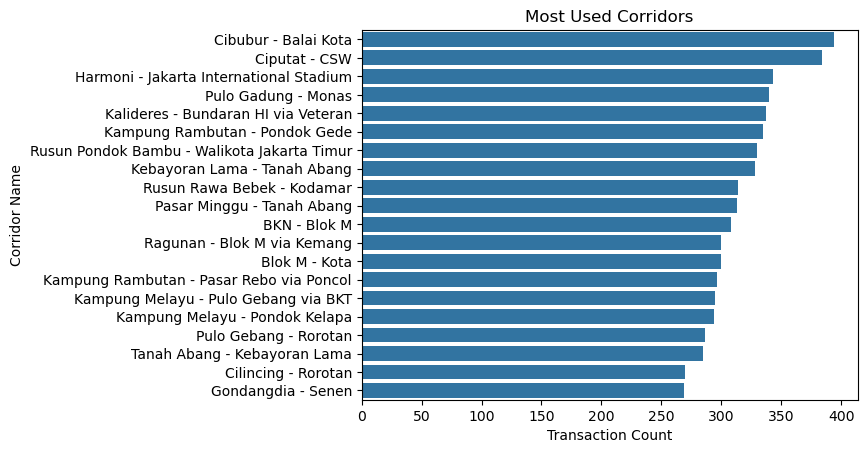

In [37]:
corridor_countshead = df['corridorName'].value_counts().head(20).sort_values(ascending=False)
sns.barplot(y=corridor_countshead.index, x=corridor_countshead.values)
plt.xlabel('Transaction Count')
plt.ylabel('Corridor Name')
plt.title('Most Used Corridors')
plt.show()

In [38]:
# these are the most commonly used traffic/routes:
print(corridor_countshead)

corridorName
Cibubur - Balai Kota                           394
Ciputat - CSW                                  384
Harmoni - Jakarta International Stadium        343
Pulo Gadung - Monas                            340
Kalideres - Bundaran HI via Veteran            337
Kampung Rambutan - Pondok Gede                 335
Rusun Pondok Bambu - Walikota Jakarta Timur    330
Kebayoran Lama - Tanah Abang                   328
Rusun Rawa Bebek - Kodamar                     314
Pasar Minggu - Tanah Abang                     313
BKN - Blok M                                   308
Ragunan - Blok M via Kemang                    300
Blok M - Kota                                  300
Kampung Rambutan - Pasar Rebo via Poncol       296
Kampung Melayu - Pulo Gebang via BKT           295
Kampung Melayu - Pondok Kelapa                 294
Pulo Gebang - Rorotan                          286
Tanah Abang - Kebayoran Lama                   285
Cilincing - Rorotan                            270
Gondangdia - Senen

We can see the most commonly used corridors/route, which may be because these routes are  most used because they connect to major residential areas, employment and commercial hubs or transport hubs to central business districts, government offices, or large event venues.

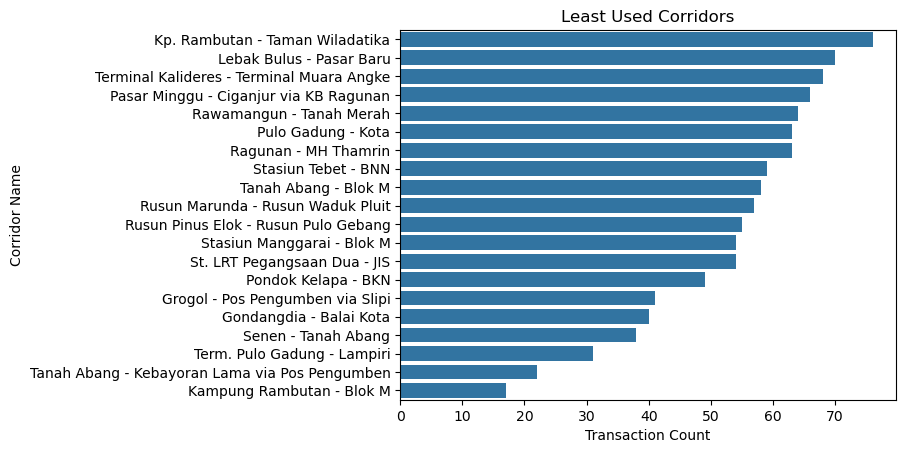

In [39]:
corridor_counts = df['corridorName'].value_counts().tail(20).sort_values(ascending=False)
sns.barplot(y=corridor_counts.index, x=corridor_counts.values)
plt.xlabel('Transaction Count')
plt.ylabel('Corridor Name')
plt.title('Least Used Corridors')
plt.show()

In [40]:
#these are the least commonly used corridors
print(corridor_counts)

corridorName
Kp. Rambutan - Taman Wiladatika                   76
Lebak Bulus - Pasar Baru                          70
Terminal Kalideres - Terminal Muara Angke         68
Pasar Minggu - Ciganjur via KB Ragunan            66
Rawamangun - Tanah Merah                          64
Pulo Gadung - Kota                                63
Ragunan - MH Thamrin                              63
Stasiun Tebet - BNN                               59
Tanah Abang - Blok M                              58
Rusun Marunda - Rusun Waduk Pluit                 57
Rusun Pinus Elok - Rusun Pulo Gebang              55
Stasiun Manggarai - Blok M                        54
St. LRT Pegangsaan Dua - JIS                      54
Pondok Kelapa - BKN                               49
Grogol - Pos Pengumben via Slipi                  41
Gondangdia - Balai Kota                           40
Senen - Tanah Abang                               38
Term. Pulo Gadung - Lampiri                       31
Tanah Abang - Kebayoran Lama via 

These are the lowest used corridor/routes, and it may be due to the lower population density with the areas having fewer major employment, commercial, or educational hubs.

Actions and Rationale:

- Increase Bus Frequency: We should increase the number of buses that are allocated in the corridors that are most used, especially the corridors that have more than 300 transactions, this will help to reduce overcrowding, decrease the wait time and help with the passenger experience whcih could potentially increase more customers.

- Promote Lesser-Used Corridors: We could also potentially work with local businesses of each stop in the route to set up events, or tourist destinations, or promos when using this line so people would use it more, we can also decorate or do collaborate with local artists, illustrators or influencers to decorate buses that use these routes to increase interest in them.

-What are the most common tap-in and tap-out stop pairs?

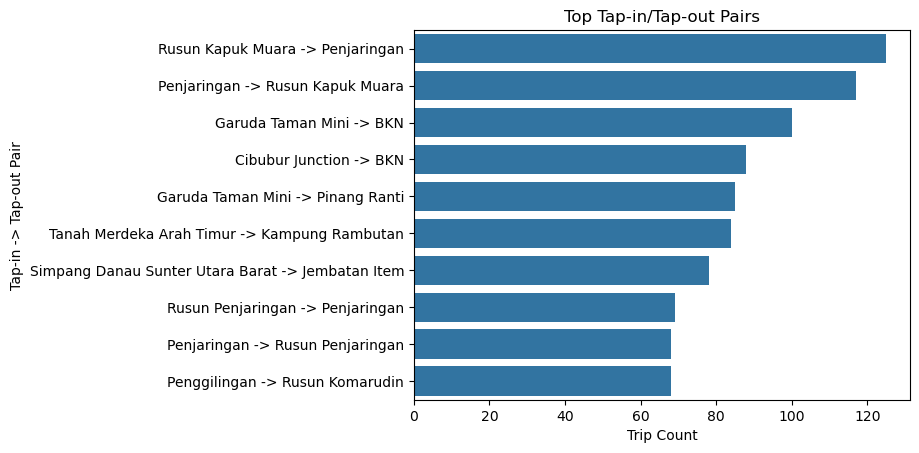

In [41]:
pair_counts = df.groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values('count', ascending=False).head(10)
sns.barplot(y=top_pairs.apply(lambda x: f"{x['tapInStopsName']} -> {x['tapOutStopsName']}", axis=1), x=top_pairs['count'])
plt.xlabel('Trip Count')
plt.ylabel('Tap-in -> Tap-out Pair')
plt.title('Top Tap-in/Tap-out Pairs')
plt.show()

In [42]:
#top station pairs
print(top_pairs)

                        tapInStopsName    tapOutStopsName  count
2876  Rusun Kapuk Muara                 Penjaringan        125  
2343  Penjaringan                       Rusun Kapuk Muara  117  
629   Garuda Taman Mini                 BKN                100  
411   Cibubur Junction                  BKN                88   
630   Garuda Taman Mini                 Pinang Ranti       85   
4090  Tanah Merdeka Arah Timur          Kampung Rambutan   84   
3695  Simpang Danau Sunter Utara Barat  Jembatan Item      78   
2891  Rusun Penjaringan                 Penjaringan        69   
2344  Penjaringan                       Rusun Penjaringan  68   
2334  Penggilingan                      Rusun Komarudin    68   


These are the commonly used pairs as Rusun Kapuk Muara and Garuda Taman Mini are big residential areas while Penjaringan is a commercial and administrative area, and BKN refers to Badan Kepegawaian Negara (National Civil Service Agency), a major government office complex. so people may travel to and from work using these pairs. 

Actions and Rationale:

- Optimize Route Planning: By identifying the most commonly used pairs, we can help to look at potentially finding other routes that also go to the top pairs, whether it be direct or non-direct routes, for example we can introduce more express routes, or ensuring that buses do not skip these key stops during peak hours.

- Monitor Service Quality: As these are the most commonly used pairs we can regularly asses the service quality in them, as well as the facilities of these stations as they are the most commonly used pairs so it can be stress tested for the wait times, and ensure the facilities here are not worn out.

-What are the most common tap-in and tap-out stations individually?

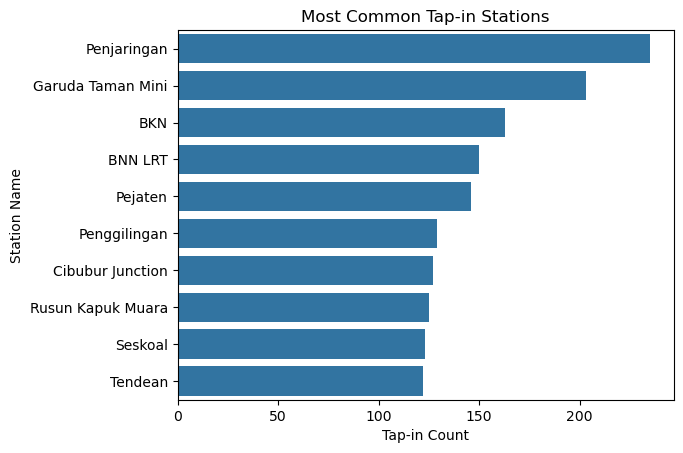

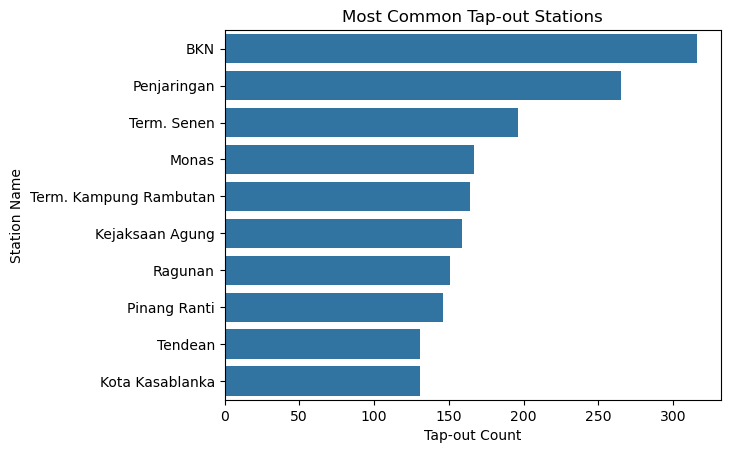

In [43]:
# Tap-in
tapin_counts = df['tapInStopsName'].value_counts().head(10)
sns.barplot(y=tapin_counts.index, x=tapin_counts.values)
plt.xlabel('Tap-in Count')
plt.ylabel('Station Name')
plt.title('Most Common Tap-in Stations')
plt.show()

# Tap-out
tapout_counts = df['tapOutStopsName'].value_counts().head(10)
sns.barplot(y=tapout_counts.index, x=tapout_counts.values)
plt.xlabel('Tap-out Count')
plt.ylabel('Station Name')
plt.title('Most Common Tap-out Stations')
plt.show()

In [44]:
#most commonly tapin stations:
print(tapin_counts)

tapInStopsName
Penjaringan          235
Garuda Taman Mini    203
BKN                  163
BNN LRT              150
Pejaten              146
Penggilingan         129
Cibubur Junction     127
Rusun Kapuk Muara    125
Seskoal              123
Tendean              122
Name: count, dtype: int64


In [45]:
#most commonly tapout stations:
print(tapout_counts)

tapOutStopsName
BKN                       316
Penjaringan               265
Term. Senen               196
Monas                     167
Term. Kampung Rambutan    164
Kejaksaan Agung           159
Ragunan                   151
Pinang Ranti              146
Tendean                   131
Kota Kasablanka           131
Name: count, dtype: int64


As previously mentioned T Rusun Kapuk Muara and Garuda Taman Mini are big residential areas while Penjaringan is a commercial and administrative area, and BKN refers to Badan Kepegawaian Negara (National Civil Service Agency), a major government office complex. so people may use these staions for commute, on the other hand Term. Senen is a frequent tap out station as this is a transportation hub, where people can go to various modes of public transit, not to mention that this area are also close to Commercial and Shopping Areas.

Actions and Rationale:

- Station Upgrades: Similarly to what was mentioned in the previous question, as they are the most commonly used stations we can invest in better service, and facilites such as shelters, seatings, and accessability features and ensuring that the facilities are not worn out.

- Crowd Management: As they are most commonly used stations we would need to make sure that we implement some crowd control measures during peak hours to ensure safety of measures, this may include making frequent checks and implementation on marked waiting lines, safety barriers, proper communication by staff to riders, and clearly amrked waiting areas that is enough to fit the crowds.

- Integration with Other Modes: similar to Term. Senen we can also work with other public or private transportation modes such as grab or gojek or taxis in the most frequently used stations

- Bus allocation and operating hours: make sure that there are enough buses operating on these stations, and ensure that there are enough buses even at night or early morning for the riders accordingly, for example they may put less buses starting at Term. Senen and Monas as they aren't a common Tapin station.

-Are there specific routes that have high usage during certain hours/days?

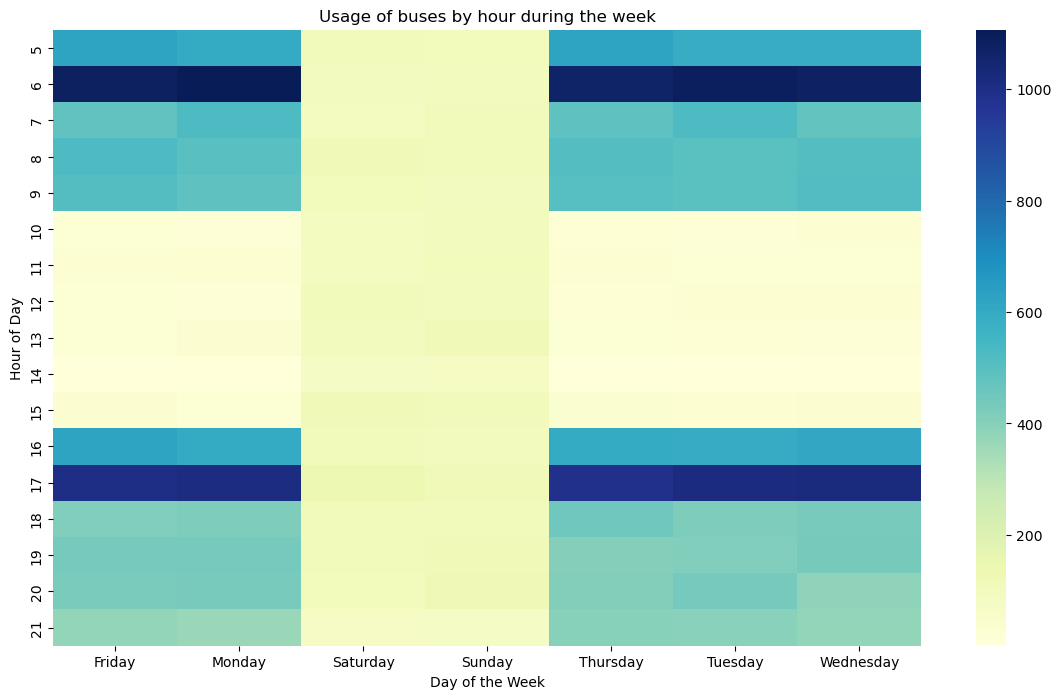

In [46]:
#Most frequent hours for riders
df['hour'] = pd.to_datetime(df['tapInTime']).dt.hour
heat = pd.crosstab(df['hour'], df['weekday'])
plt.figure(figsize=(14,8))
sns.heatmap(heat, cmap='YlGnBu')
plt.title('Usage of buses by hour during the week')
plt.ylabel('Hour of Day')
plt.xlabel('Day of the Week')
plt.show()

In the heatmaps we can see that the most commonly hour that riders use transjakarta is around 06:00 and 17:00 this may be due to the surge of commuters going to and coming back form work with the least number of riders being from 10 to 15 which is when a majority of people are at work. Meanwhile in we can see that the most days frequently used days are weekdays, while there are less people using transjakarta on Saturday and Sunday as they are weekends, and people may prefer either to stay home, or travel with family using personal or private modes of transportation.

Actions and Rationale:

- Bus Allocation Adjustment: The number of buses should be adjusted to match passenger surges during morning and evening rush hours to prevent overcrowding and ensure smooth service.

- Improved Peak Hour Service: Additional facilities and better management during peak times are important, such as increasing bus frequency to reduce waiting times.

- Weekend Usage Promotion: Encourage Transjakarta use on weekends through promotions, especially at stops near shopping centers and tourist destinations.

- Monitoring Time and Day Patterns: Regularly monitor and evaluate passenger travel patterns so that service planning can be more responsive and data-driven.

- Optimizing Routes to Tourist and Commercial Areas: Ensure routes to tourist spots and commercial centers have adequate service, particularly on weekends.

Summary of Findings

- Most Commonly Used Corridors
Top 5 routes:

Cibubur – Balai Kota

Ciputat – CSW

Harmoni – Jakarta International Stadium

Pulo Gadung – Monas

Kalideres – Bundaran HI (via Veteran)
These corridors connect key residential, employment, and commercial areas.

- Top Tap-In to Tap-Out Pairs

Rusun Kapuk Muara to Penjaringan

Penjaringan to Rusun Kapuk Muara

Garuda Taman Mini to BKN
These pairs represent frequent trips between major residential zones and government or business districts.

- Most Frequently Used Stations

Rusun Kapuk Muara

Garuda Taman Mini

Penjaringan

BKN

Terminal Senen
These stations are central hubs for residential, commercial, and transit activity.

- Peak Usage Times

Morning peak: 06:00

Evening peak: 17:00

Most active on weekdays
These trends align with commuter travel behavior.


-Recommendations for Transjakarta:

Increase Bus Frequency on High-Traffic Routes: Increase the number of buses on high-traffic routes to reduce congestion and wait times.

Promote Less-Used Corridors: Partner with local businesses and influencers to attract more passengers through events and promotions.

Optimize Popular Bus Stop Pairs: Add direct or express routes, especially during peak hours, to speed up travel and reduce congestion.

Infrastructure Maintenance and Improvement: Prioritize maintenance and improvement of facilities at the most frequently used bus stops and routes to ensure they remain comfortable and reliable.

Implement Passenger Density Management: Use queue signs, barriers, and active communication from staff during peak hours to maintain safety and order.

Strengthen Transportation Integration: Develop connectivity with online motorcycle taxis, taxis, and other public transportation to make travel easier and more complete.

Adjust Bus Allocation Based on Time and Day: Add buses during peak hours and weekends in commercial and tourist areas, and optimize schedules during off-peak hours and less crowded stations.

Monitor Travel Patterns Regularly: Evaluate passenger data regularly to adjust services to changing needs.
